In [10]:
# !pip install opencv-python==4.2.0.34

     |████████████████████████████████| 49.1 MB 3.7 MB/s            


In [11]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('data/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [15]:
print(f"The number of unique breeds available in the dataset: {len(df.breed.unique())}")

The number of unique breeds available in the dataset: 120


# Original dataset with all dog breeds
**It is important to mention that it was a Kaggle competition - [Dog Breed Identification ](https://www.kaggle.com/c/dog-breed-identification), and test labels were not provided, as each participant had to submit the test labels predicted by their model**

In [18]:
freq_vector_train = df.breed.value_counts()
freq_vector_train

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

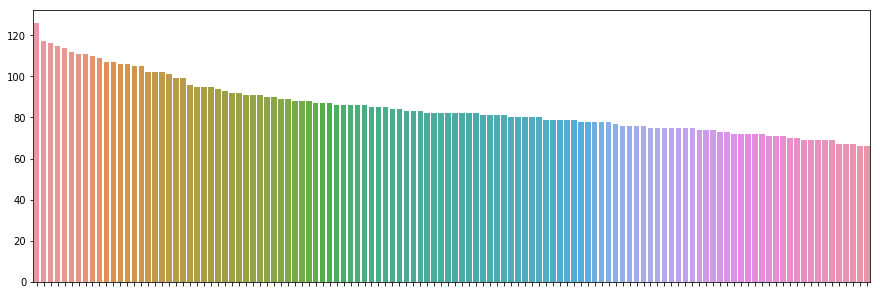

In [19]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=freq_vector_train.index, y=freq_vector_train.values, orient='v', dodge=True)
# for p, label in zip(ax.patches, freq_vector_train.index):
#     ax.annotate(label, (p.get_x() + p.get_width() / 2, p.get_height()),
#                 ha='center', va='center', xytext=(0, 9), textcoords='offset points',
#                 rotation=45.0, fontsize=8.0)
ax.set(xticklabels=[])
plt.savefig('eda&different_graphs/breed_distribution_ALL.png', dpi=300)
plt.show()

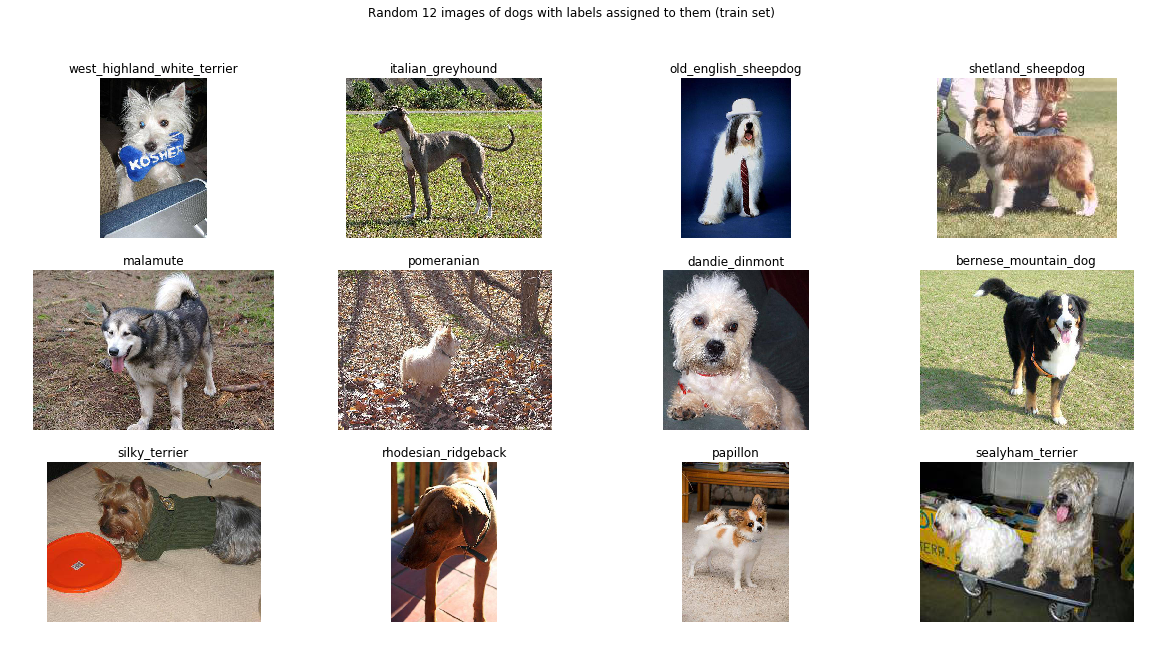

In [23]:
import os
path_to_imgs = 'data/train'
folder = os.listdir(path_to_imgs)
test_folder = os.listdir('data/test')

w, h = 4, 3
np.random.seed(5)
rand_idxs = np.random.choice(np.arange(len(folder)), replace=False, size=w*h)
fig, axes = plt.subplots(ncols=w, nrows=h, figsize=(20, 10))

for idx, ax in zip(rand_idxs, axes.ravel()):
    name_id = folder[idx]
    label = df[df.id == name_id[:-4]].breed.values[0]
    img = plt.imread(f'{path_to_imgs}/{name_id}')
    ax.imshow(img)
    ax.title.set_text(label)
    ax.axis('off')

fig.suptitle(f"Random {w*h} images of dogs with labels assigned to them (train set)")

plt.savefig('eda&different_graphs/random_12_dogs.png')
plt.show()

As we can see, the 12 randomly selected images of dogs are of different shape, the shapes of the images in the train datasets differs, however, they all must be of 3 channel meaning RGB

In [24]:
print(f"Number of images in the train folder: {len(folder)}")
print(f"Number of images in the test folder: {len(test_folder)}")

Number of images in the train folder: 10222
Number of images in the test folder: 10357


# Top 10 most frequent breeds

## Exploration

In [25]:
top10 = df.breed.value_counts()[:10]
df_top10 = df[df.breed.isin(top10.index.values)]
unique_series = df_top10.breed.value_counts()

In [26]:
df_top10

,id,breed
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
12,00693b8bc2470375cc744a6391d397ec,maltese_dog
57,0162b3e0144fb1d1ab82fbff3ace9938,shih-tzu
70,01b36cb1b80ab8c3a7d2b7128ad21bdc,samoyed
...,...,...
10195,ff54d45962b3123bb67052e8e29a60e7,basenji
10200,ff7d9c08091acc3b18b869951feeb013,maltese_dog
10204,ffa0055ec324829882186bae29491645,maltese_dog
10207,ffa4e1bf959425bad9228b04af40ac76,basenji


In [29]:
unique_series

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
pomeranian              111
great_pyrenees          111
basenji                 110
samoyed                 109
Name: breed, dtype: int64

In [30]:
print("The total number of images of top 10 breeds: ", len(df_top10))

The total number of images of top 10 breeds:  1141


Let's vizualize:

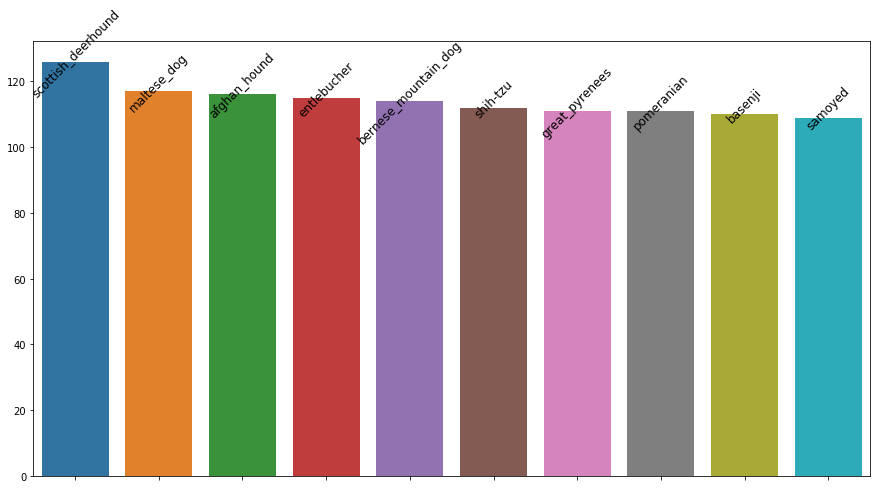

In [31]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=unique_series.index, y=unique_series.values, orient='v', dodge=True)
for p, label in zip(ax.patches, freq_vector_train.index):
    ax.annotate(label, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points',
                rotation=45.0, fontsize=12.0)
ax.set(xticklabels=[])
plt.savefig('eda&different_graphs/breed_distribution_TOP10.png', dpi=300)
plt.show()

## Vizualization of what top 10 dog breeds look like (randomly chosen 10 images of the dogs of most frequent breeds)

In [32]:
df_top10

,id,breed
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
12,00693b8bc2470375cc744a6391d397ec,maltese_dog
57,0162b3e0144fb1d1ab82fbff3ace9938,shih-tzu
70,01b36cb1b80ab8c3a7d2b7128ad21bdc,samoyed
...,...,...
10195,ff54d45962b3123bb67052e8e29a60e7,basenji
10200,ff7d9c08091acc3b18b869951feeb013,maltese_dog
10204,ffa0055ec324829882186bae29491645,maltese_dog
10207,ffa4e1bf959425bad9228b04af40ac76,basenji


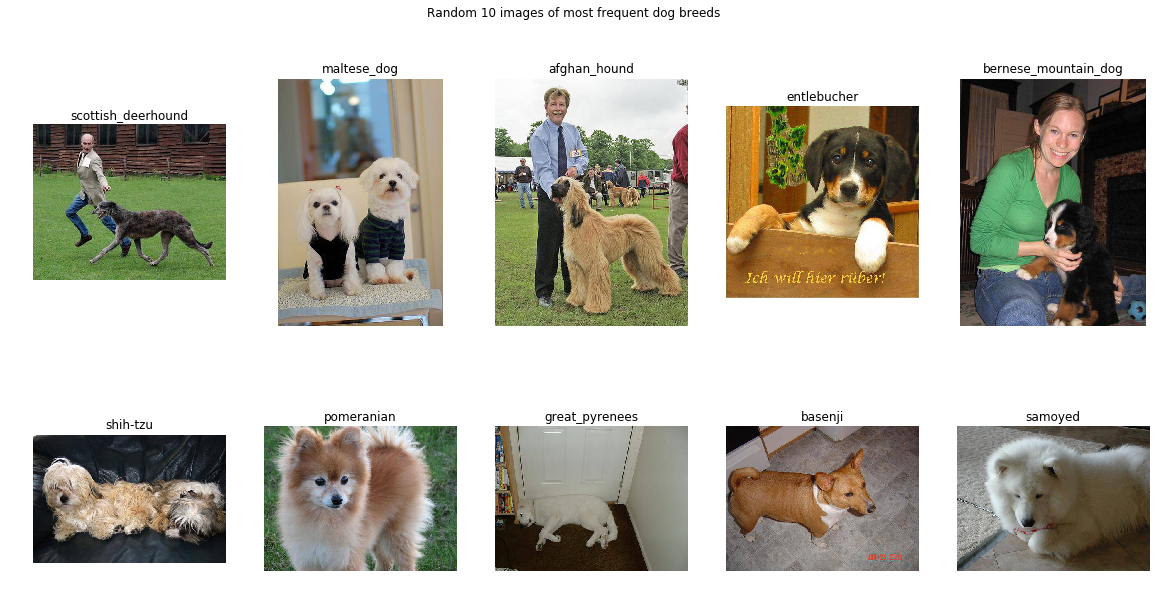

In [33]:
w, h = 5, 2
np.random.seed(5)

fig, axes = plt.subplots(ncols=w, nrows=h, figsize=(20, 10))

for ax, breed_label in zip(axes.ravel(), unique_series.index):
    
    name_id = np.random.choice(df_top10[df_top10.breed == breed_label].id.values)
    # print(name_id, breed_label)
    img = plt.imread(f'{path_to_imgs}/{name_id}.jpg')
    ax.imshow(img)
    ax.title.set_text(breed_label)
    ax.axis('off')

fig.suptitle(f"Random {w*h} images of most frequent dog breeds")

plt.savefig('eda&different_graphs/top10_random_dogs.png')
plt.show()

# Using pretrained model for top 10 dataset (Using *tensorflow*) on input images that are rescaled to (64, 64, 3), split into 9/1 train/test ratio

In [34]:
import tensorflow as tf
from tensorflow import keras

In [106]:
img_height = 64
img_width = 64

## Encoding breeds so that they can are compatible with processing by the loss function

In [101]:
df_top10["breed_coded"] = df_top10.breed.astype('category').cat.codes

## Resizing an image

In [107]:
dim = (img_width, img_height)
batch_size = 32


def func(id):
    img = cv2.imread(f'{path_to_imgs}/{id}.jpg', cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(df_top10.id, df_top10.breed_coded, 
                                                              test_size=0.1, random_state=42,
                                                             stratify=df_top10.breed_coded)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

In [109]:
train_images = np.array([func(id) for id in X_train])
test_images = np.array([func(id) for id in X_test])

## AlexNet

Loading a pretrained AlexNet model

In [132]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on AlexNet
    include_top=False)

Let's check its architecture

In [133]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

The 20M+ parameters sounds good, but it is way too much to retrain for our purposes;

We will need to freeze it in order to take advantage of the Transfer Learning

In [134]:
base_model.trainable = False
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [135]:
x = base_model.output
x = keras.layers.BatchNormalization()(x)
x = keras.layers.GlobalAveragePooling2D()(x)
# and a logistic layer -- with 10 classes
predictions = keras.layers.Dense(10, activation='softmax')(x)

# this is the model we will train
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [136]:
y_binary_train = keras.utils.to_categorical(train_labels)
y_binary_test = keras.utils.to_categorical(test_labels)

In [137]:
EPOCHS = 150
history = model.fit(
    train_images, y_binary_train, epochs=EPOCHS
)

Train on 1026 samples
Epoch 1/150
1026/1026 [==============================] - 10s 10ms/sample - loss: 2.8394 - accuracy: 0.1062
Epoch 2/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 2.5488 - accuracy: 0.1540
Epoch 3/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 2.2906 - accuracy: 0.2154
Epoch 4/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 2.2319 - accuracy: 0.2593
Epoch 5/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 2.1466 - accuracy: 0.2924
Epoch 6/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 1.9969 - accuracy: 0.3314
Epoch 7/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 1.9479 - accuracy: 0.3324
Epoch 8/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 1.9320 - accuracy: 0.3684
Epoch 9/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 1.8653 - accuracy: 0.3616
Epoch 10/150
1026/1026 [=======

1026/1026 [==============================] - 8s 8ms/sample - loss: 1.1936 - accuracy: 0.6394
Epoch 79/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 1.0961 - accuracy: 0.6530
Epoch 80/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 1.0731 - accuracy: 0.6676
Epoch 81/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 1.0222 - accuracy: 0.6891
Epoch 82/150
1026/1026 [==============================] - 9s 8ms/sample - loss: 1.0190 - accuracy: 0.6745
Epoch 83/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 1.0647 - accuracy: 0.6657
Epoch 84/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 1.1918 - accuracy: 0.6316
Epoch 85/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 1.1091 - accuracy: 0.6520
Epoch 86/150
1026/1026 [==============================] - 8s 8ms/sample - loss: 1.0358 - accuracy: 0.6657
Epoch 87/150
1026/1026 [==============================] - 8

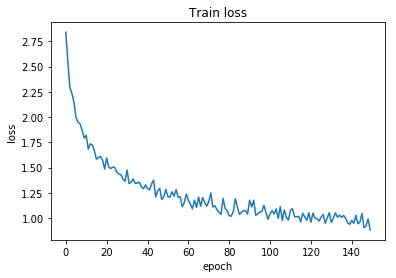

In [154]:
plt.plot(history.history['loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig("eda&different_graphs/AlexNetBaselineLoss.png", dpi=300)
plt.show()

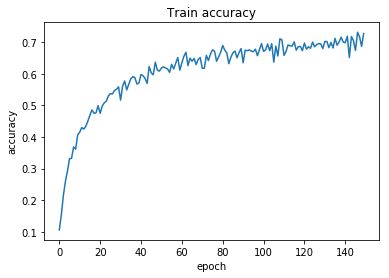

In [153]:
plt.plot(history.history['accuracy'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig("eda&different_graphs/AlexNetBaselineAccuracy.png", dpi=300)
plt.show()

## Evaluation of the model and saving results to pd.DataFrame and then to *.csv* file

In [140]:
results = model.evaluate(test_images, y_binary_test, batch_size=batch_size)
print("test loss, test acc:", results)

115/115 [==============================] - 1s 13ms/sample - loss: 190.1160 - accuracy: 0.1043
test loss, test acc: [190.1160417639691, 0.104347825]


In [150]:
res_df = pd.DataFrame()
res_df["TestAccuracy"] = [results[0]]
res_df["TestLoss"] = [results[1]]
res_df["ModelDescription"] = ["Fine-tuned AlexNet, Normalized, 150 Epochs, No augmentation applied"]
res_df

,TestAccuracy,TestLoss,ModelDescription
0,190.116042,0.104348,"Fine-tuned AlexNet, Normalized, 150 Epochs, No..."


In [152]:
res_df.to_csv("results.csv")
